In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

<h3> 1 Understand the data

In [5]:
# Import data
dfCCData = pd.read_csv('../Data/creditcard.csv')
dfCCData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dfCCData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
dfCCData.shape

(284807, 31)

In [7]:
cols = dfCCData.columns
cols

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000240F1937240>,
      dtype=object)

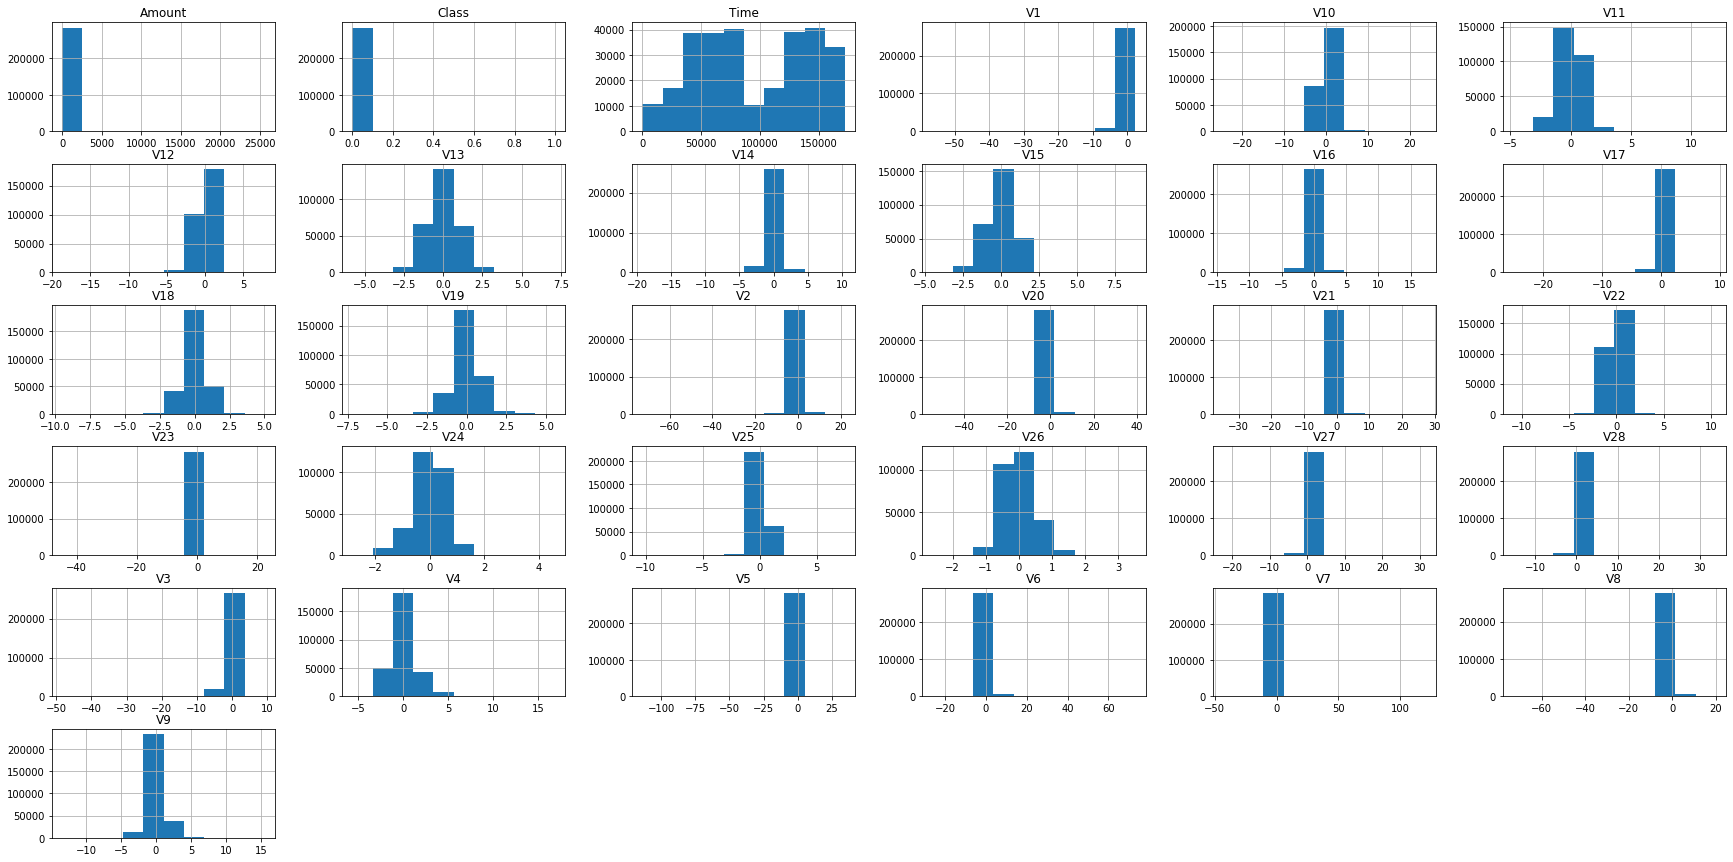

In [8]:
dfCCData.hist(figsize=[30, 15])

In [24]:
dfGroup = dfCCData.groupby(by='Class')
dfGroup.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1            ...       V28             \
            75%       max     count      mean  ...       75%        max   
Class                                          ...                        
0      139333.0  172792.0  284315.0  0.008258  ...  0.077962  33.847808   
1      128483.0  170348.0     492.0 -4.771948  ...  0.381152   1.779364   

         Amount                                                              
          count        mean         std  min   25%    50%     75%       max  
Class                                                                        
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16  
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87  

[2 rows x 240 columns]

In [34]:
dfGroup.V1.count().values

array([284315,    492], dtype=int64)

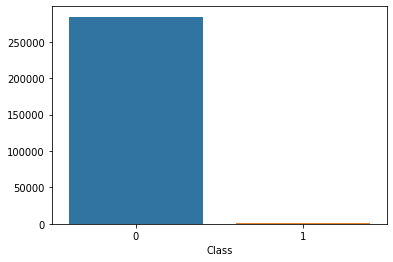

In [35]:
sns.barplot(dfGroup.V1.count().index, dfGroup.V1.count().values)

<b> Findings from the data </b>
1) No null values
2) Very much imbalanced data in target Class
3) All are numerical values

<h3> 2 Model Development 

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, classification_report, precision_recall_curve, roc_auc_score
from sklearn.cluster import DBSCAN, KMeans
from sklearn.svm import SVC

In [39]:
X = dfCCData.drop(columns=['Time', 'Class'])
Y = dfCCData.Class

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=12345)

In [43]:
svc = SVC(C=2, random_state=12345)

In [45]:
svc.fit(X_train, Y_train)
#svc.fit(X_train, Y_train, sample_weight)

C:\Anaconda3\envs\ProductDossier2\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=12345,
    shrinking=True, tol=0.001, verbose=False)

In [47]:
Y_predicted = svc.predict(X_test)

<h3> 3 Mode Performance

In [133]:
precision, recall, _ = roc_curve(Y_test, Y_predicted)
accuracy = accuracy_score(Y_test, Y_predicted)

In [139]:
print("model accuracy {}, precision {} and recall {}".format(accuracy, precision[2], recall[1]))

model accuracy 0.9990168884519505, precision 1.0 and recall 0.42758620689655175


In [145]:
roc_auc_score(Y_predicted, Y_test, average='samples')

0.9915774297538177

In [108]:
count = 0
for i in range(len(Y_predicted)):
    if(Y_predicted[i] != Y_test.iloc[i]):
        count += 1

In [110]:
print("Misclassification ratio is {}".format(count/len(Y_predicted)*100))

Misclassification ratio is 0.0983111548049577


In [126]:
{'0': len(Y_predicted[Y_predicted == 0]), '1': len(Y_predicted[Y_predicted == 1])}

{'0': 85380, '1': 63}

In [127]:
{'0': len(Y_test[Y_test == 0]), '1': len(Y_test[Y_test == 1])}

{'0': 85298, '1': 145}

In [147]:
len(Y_predicted[Y_predicted == 1]) / len(Y_test[Y_test == 1])

0.43448275862068964

<h3> 4 Conclusion

Although model performance is good but fraud detection is as low as 43% so model is averge performing and not a very good model.

# Lets try other algorithms

<b> Lets reduce the data

In [255]:
dfCCData2 = dfCCData.sample(frac=1, random_state=12345)
X = dfCCData2.drop(columns=['Time', 'Class'])
Y = dfCCData2.Class

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=12345)

In [256]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [257]:
isoForr = IsolationForest(n_estimators=100, contamination=len(Y_train[Y_train==1])/len(Y_train[Y_train==0]), max_samples=len(X_train), random_state=12345)

In [258]:
isoForr.fit(X_train, Y_train)

C:\Anaconda3\envs\ProductDossier2\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False,
                contamination=0.0016529756073052479, max_features=1.0,
                max_samples=199364, n_estimators=100, n_jobs=None,
                random_state=12345, verbose=0, warm_start=False)

In [259]:
Y_predicted = isoForr.predict(X_test)

In [260]:
Y_predicted[Y_predicted==1] = 0
Y_predicted[Y_predicted==-1] = 1

In [261]:
precision, recall, _ = roc_curve(Y_test, Y_predicted)
accuracy = accuracy_score(Y_test, Y_predicted)
print("model accuracy {}, precision {} and recall {}".format(accuracy, precision[2], recall[1]))

model accuracy 0.9972964432428637, precision 1.0 and recall 0.3067484662576687


In [262]:
len(Y_predicted[Y_predicted == 1]) / len(Y_test[Y_test == 1])

1.030674846625767

In [263]:
locOut = LocalOutlierFactor(n_neighbors=20, leaf_size=30, novelty=True, contamination=len(Y_train[Y_train==1])/len(Y_train[Y_train==0]))

In [264]:
locOut.fit(X_train, Y_train)

LocalOutlierFactor(algorithm='auto', contamination=0.0016529756073052479,
                   leaf_size=30, metric='minkowski', metric_params=None,
                   n_jobs=None, n_neighbors=20, novelty=True, p=2)

In [265]:
Y_predicted = locOut.predict(X_test)
Y_predicted[Y_predicted==1] = 0
Y_predicted[Y_predicted==-1] = 1

In [266]:
precision, recall, _ = roc_curve(Y_test, Y_predicted)
accuracy = accuracy_score(Y_test, Y_predicted)
print("model accuracy {}, precision {} and recall {}".format(accuracy, precision[2], recall[1]))

model accuracy 0.9964186650749622, precision 1.0 and recall 0.03067484662576687


In [267]:
len(Y_predicted[Y_predicted == 1]) / len(Y_test[Y_test == 1])

0.9386503067484663

In [273]:
len(Y_predicted[Y_predicted == 0])

85290

In [274]:
len(Y_test[Y_test == 0])

85280

# Conclusion

1) SVM Model is performing better than IsolationForrest and LocalOutlier <br>
2) Even though data ratio is very low still model are performing better for fraud detection <br>
3) All these performance calculations are done without any feature extraction and selection